<a href="https://colab.research.google.com/github/AshOne91/PLAYDATA-COLAB/blob/main/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_%EA%B0%9C%EC%9A%94_%EB%B0%8F_%EC%82%AC%EB%A1%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]
length = bream_length + smelt_length
weight = bream_weight + smelt_weight
import pandas as pd
data = {
    'length' : length,
    'weight' : weight,
    'class' : [1] * len(bream_length) + [0] * len(smelt_length)
}
df = pd.DataFrame(data)
df.head()


,length,weight,class
0,25.4,242.0,1
1,26.3,290.0,1
2,26.5,340.0,1
3,29.0,363.0,1
4,29.0,430.0,1


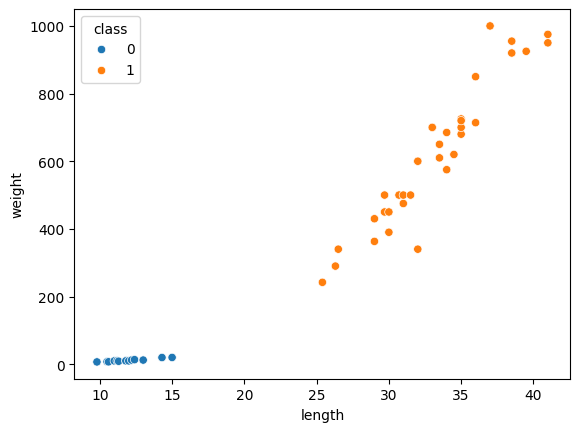

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(x='length', y='weight', hue='class', data=df)
plt.show()

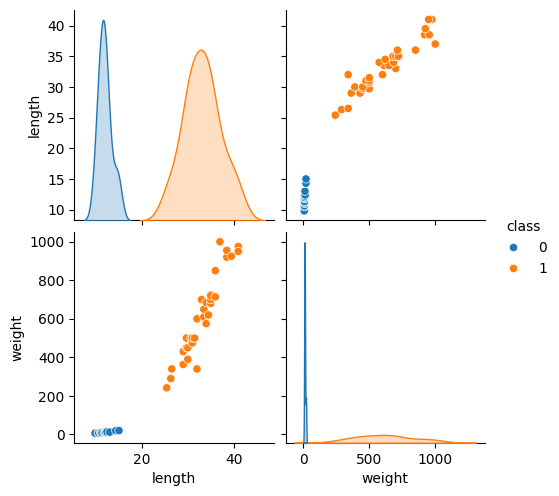

In [ ]:
sns.pairplot(df, hue='class')

K 최근접 이웃 알고리즘
```
유클리드 거리
d(x,xi) 새로운데이터 x와 기존 데이터 xi간 의 거리
xij : i번째 기존데이터의 j번재 특성값
m : 특성수( 길이, 너비)
```

$$d(x, x_i) = \sqrt{\sum_{j=1}^{m} (x_j - x_{i,j})^2}$$

# 유클리드 거리
```
피타고라스의 정리를 기반으로 두점사이의 직선의 거리(최단거리)를 계산
p(x1, y1) p(x2,y2)
x축 거리의 차이 = x변화량
y 거리의 차이 = y변화량
직각삼각형의 빗변의 역활
```

$$ d(P, Q) = \sqrt{(x_2 - x_1)^2 + (y_2 - y_1)^2} $$

```
이걸 n차원으로 확장하면
각 좌표마다 차이 계산 xi = xi-yi
모든 차원의 거리 차이를 피타고라스 정리에 적용
```

$$d(x, x_i) = \sqrt{\sum_{j=1}^{m} (x_j - x_{i,j})^2}$$

In [ ]:
# A( 1,2,3 ) B(4,6,8)
# x 좌표 차이 4-1 = 3
# y 좌표 차이 6-2 = 4
# z 좌표 차이 8-3 = 5
# 유클리드 거리 적용
# d(A,B)  np.sqrt(9 + 16 +25  ) = np.sqrt(50)  대략 7.xxxxxxxxx

# 유클리드거리 응용
# 최근접이웃, k-평균 클러스터, 이미지처리(색상간 거리 계산), 추천시스템 - 유저간 유사도

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
# X, y 데이터 분리
X = df.drop('class', axis=1).to_numpy()
y = df['class'].to_numpy()
kn.fit(X, y)   # 모델 학습
kn.score(X, y)  # 모델 평가 accuracy(정확성)  정답에 비래해서 맞은비율

1.0

In [ ]:
(kn.predict(X) == y).sum() / len(y)

np.float64(1.0)

# 새로운 생성을 예측

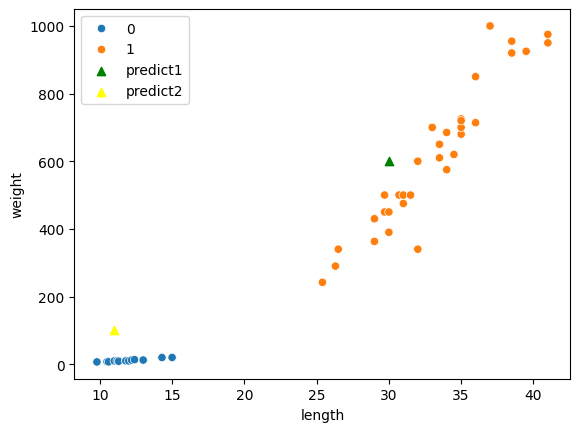

예측은 predict1 :  [1]
예측은 predict2 :  [0]


In [ ]:
# 길이가 30이고 무게가 600이면 도미? 빙어?
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(x='length', y='weight', hue='class', data=df)
plt.scatter(30, 600, marker='^',color = 'green',label='predict1')
plt.scatter(11, 100, marker='^',color = 'yellow',label='predict2')
plt.legend()
plt.show()
# 예측
print('예측은 predict1 : ',kn.predict([[30, 600]]))
print('예측은 predict2 : ',kn.predict([[11, 100]]))

In [ ]:
# knn의 알고리즘의 n_neibors의 값을 전체 데이터로 하면
# 이웃은 가장 거리가 가까운 데이터부터 찾는데.. 전체로하면 전체의 속성을 가지고 다수결을 따른다. (평균)
# 지금처러 샘플링 편향이 있는경우는 이런 유클리드 거리방식의 알고리즘은 정확도가 떨어진다.
kn = KNeighborsClassifier(n_neighbors=len(X))  # 49
kn.fit(X, y)  #  학습
kn.score(X, y)  # 평가

0.7142857142857143

In [ ]:
print(len(bream_length), len(smelt_length))
35 / 49

35 14


0.7142857142857143

In [ ]:
14/49,  35/49

(0.2857142857142857, 0.7142857142857143)

# 데이터 섞기
```
클래스 불균형이 거의 대다수차지하고 있는 현실에서
균형잡히게 학습데이터와 검증용 데이터를 섞는게 중요
이때 클래스간 균형의 비율을 적용해서 섞어야 정확함
```

In [ ]:
from sklearn.model_selection import train_test_split
# test_size = 0.25    7.5 : 2.5
X_train,X_test,y_train,y_test =  train_test_split(X,y,random_state=42)
print(X_train.shape, X_test.shape)
# 학습
kn = KNeighborsClassifier()
kn.fit(X_train, y_train)
# 평가
kn.score(X_train, y_train), kn.score(X_test, y_test)

(36, 2) (13, 2)


(1.0, 1.0)

In [ ]:
y_train

array([1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0])

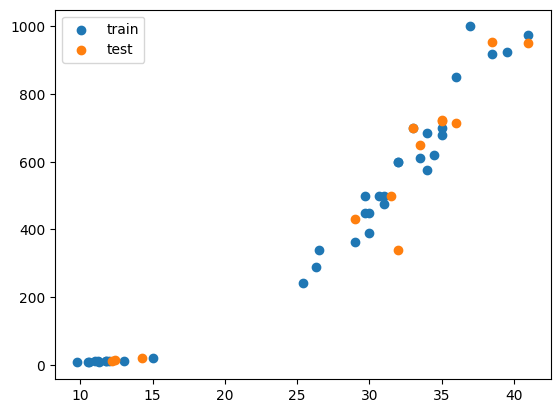

In [ ]:
plt.scatter(X_train[:,0], X_train[:,1],label = 'train')
plt.scatter(X_test[:,0], X_test[:,1], label = 'test')
plt.legend()
plt.show()

# 데이터를 클래스비율을 고려해서 섞기
```
train_test_split 의 옵션을 stratify=y 적용
```

(36, 2) (13, 2)


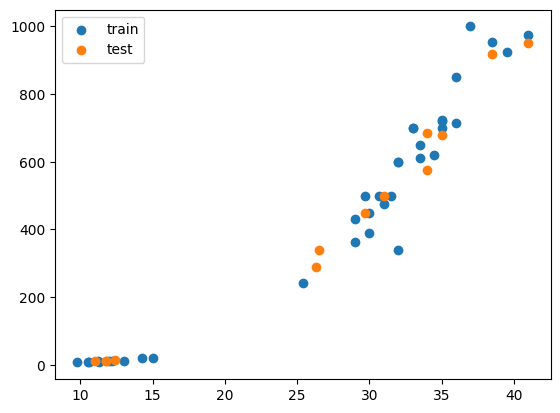

In [ ]:
X_train,X_test,y_train,y_test =  train_test_split(X,y,random_state=42,stratify=y)
print(X_train.shape, X_test.shape)
plt.scatter(X_train[:,0], X_train[:,1],label = 'train')
plt.scatter(X_test[:,0], X_test[:,1], label = 'test')
plt.legend()
plt.show()

# IRIS 붓꽃 데이터의 품질을 예측  3종류... 다중분류

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()
iris.data

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
import numpy as np
np.unique( iris.target),   len(iris.target == 0),len(iris.target == 1),len(iris.target == 2)


(array([0, 1, 2]), 150, 150, 150)

In [ ]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

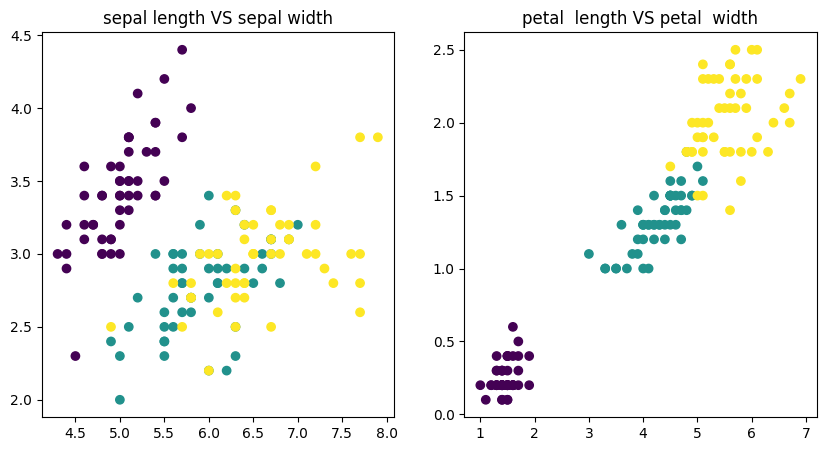

In [ ]:
X = iris.data
y = iris.target
# 시각화
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('sepal length VS sepal width')
plt.scatter(X[:,0], X[:,1], c=y)
plt.subplot(1,2,2)
plt.title('petal  length VS petal  width')
plt.scatter(X[:,2], X[:,3], c=y)
plt.show()

# 머신러닝 적용순서
```
데이터의 특성및 목표에 따라서 분류와 회귀를 정함
데이터 전처리작업(결측치, 이상치, 피처엔지니어링(특성공학))
적합한 모델 선택
모델훈련
모델 평가
만약 평가가 안좋으면 모델의 파라메터를 조정해서 다시 학습-평가를 반복
그래도 안좋으면... 이번에는 다른 모델로 평가
결론 : 최적의 모델과 해당 모델의 최적의 파라메터값을 찾아서 모델을 생성 배포
```

In [ ]:
# 데이터을 수집( iris)
from sklearn.datasets import load_iris ,lo
iris = load_iris()
# 테이터를 분할(학습 / 평가)
X = iris.data
y = iris.target
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test =  train_test_split(X,y,random_state=45,stratify=iris.target)
# 모델선택(k neigbors)
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
# 학습데이터로 학습
kn.fit(X_train, y_train)
# 학습데이터와 평가용데이터로 모델의 예측 정확성을 평가
kn.score(X_train, y_train), kn.score(X_test, y_test)
# 만약에. .학습데이터는 성능이 좋은데 평가용은 성능이 낮다면.. 이건 바로 과적합

(0.9642857142857143, 0.9473684210526315)

# 사이킷런의 유방암여부 판단 모델 - 최근접 이웃

In [ ]:
# 데이터 가져오기
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
cancer.data.shape, np.unique(cancer.target)

((569, 30), array([0, 1]))

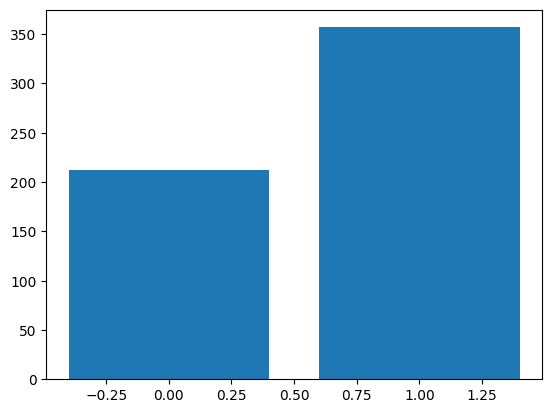

In [ ]:
a,b = np.unique(cancer.target, return_counts=True)
plt.bar(a,b)
plt.show()

In [ ]:
# 데이터 분할
X = cancer.data
y = cancer.target
X_train,X_test,y_train,y_test =  train_test_split(X,y,random_state=45, stratify = cancer.target)

In [ ]:
kn = KNeighborsClassifier()
kn.fit(X_train, y_train)  # 학습
kn.score(X_train, y_train), kn.score(X_test, y_test)  # 평가

(0.931924882629108, 0.9300699300699301)

In [ ]:
# 와인
from sklearn.datasets import load_wine
wine = load_wine()
print(wine.keys())
print(wine.data.shape, np.unique(wine.target))
df = pd.DataFrame(wine.data, columns=wine.feature_names)
df['class'] = wine.target
df.describe()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])
(178, 13) [0 1 2]


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [ ]:
# 데이터 분할
from sklearn.preprocessing import StandardScaler
X = wine.data
y = wine.target
X = StandardScaler().fit_transform(X)

X_train,X_test,y_train,y_test =  train_test_split(X,y,random_state=45, stratify = wine.target)

# 모델 선택
kn = KNeighborsClassifier(n_neighbors=5)
# 학습
kn.fit(X_train, y_train)
# 평가  스케일링 전  (0.7669172932330827, 0.6666666666666666)   -- > (0.9774436090225563, 0.9555555555555556)
kn.score(X_train, y_train), kn.score(X_test, y_test)

(0.9774436090225563, 0.9555555555555556)

In [ ]:
np.unique(wine.target, return_counts=True)

(array([0, 1, 2]), array([59, 71, 48]))

In [ ]:
# SMOTE 이용한 샘플링 편향 조정
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_over, y_train_over = smote.fit_resample(X, y)
print(np.unique(y_train_over, return_counts=True))
X_train,X_test,y_train,y_test =  train_test_split(X,y,random_state=45, stratify = wine.target)

# 모델 선택
kn = KNeighborsClassifier(n_neighbors=5)
# 학습
kn.fit(X_train, y_train)
# 평가
kn.score(X_train, y_train), kn.score(X_test, y_test)

(array([0, 1, 2]), array([71, 71, 71]))


(0.7669172932330827, 0.6666666666666666)

In [ ]:
!pip install ucimlrepo
from ucimlrepo import fetch_ucirepo

# fetch dataset
student_performance = fetch_ucirepo(id=320)

# data (as pandas dataframes)
X = student_performance.data.features
y = student_performance.data.targets

In [ ]:
X.shape, np.unique(y['G3'],return_counts=True)
y = y['G3']

In [ ]:
# 모델 적용
X = X.select_dtypes(include='number')
X.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences
0,18,4,4,2,2,0,4,3,4,1,1,3,4
1,17,1,1,1,2,0,5,3,3,1,1,3,2
2,15,1,1,1,2,0,4,3,2,2,3,3,6
3,15,4,2,1,3,0,3,2,2,1,1,5,0
4,16,3,3,1,2,0,4,3,2,1,2,5,0


In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y, random_state=42)
kn = KNeighborsClassifier()
kn.fit(X_train, y_train)
kn.score(X_train, y_train), kn.score(X_test, y_test)

(0.39300411522633744, 0.13496932515337423)

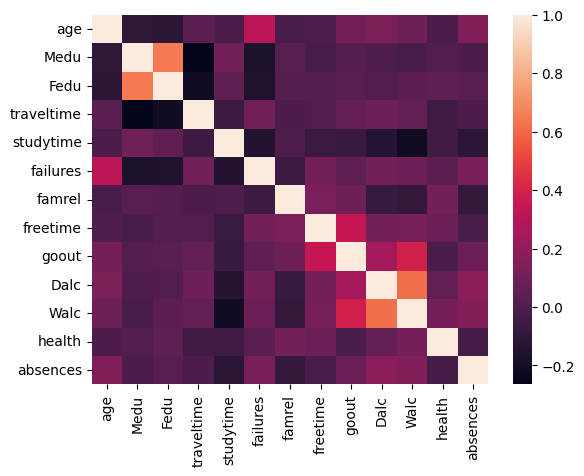

In [ ]:
corr = X.corr()
sns.heatmap(corr)
plt.show()

In [ ]:

X_train,X_test,y_train,y_test = train_test_split(X.loc[:,'Medu':'studytime'],y, random_state=42)
kn = KNeighborsClassifier()
kn.fit(X_train, y_train)
kn.score(X_train, y_train), kn.score(X_test, y_test)

(0.2674897119341564, 0.1656441717791411)

In [ ]:
temp = dict( zip( np.unique(y.values ), list(range(len(y))) ) )
y2 = y.map(temp)
X_train,X_test,y_train,y_test = train_test_split(X,y2, random_state=42 ,stratify=y2)
kn = KNeighborsClassifier()
kn.fit(X_train, y_train)
kn.score(X_train, y_train), kn.score(X_test, y_test)

# stratify=y2를 사용하려면 셈플의 수가 6개 보다 많아야 함

ValueError: The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2.

# 표준화 - Scaling

In [ ]:
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]
length = bream_length + smelt_length
weight = bream_weight + smelt_weight
import pandas as pd
data = {
    'length' : length,
    'weight' : weight,
    'class' : [1] * len(bream_length) + [0] * len(smelt_length)
}
df = pd.DataFrame(data)
df.head()

,length,weight,class
0,25.4,242.0,1
1,26.3,290.0,1
2,26.5,340.0,1
3,29.0,363.0,1
4,29.0,430.0,1


[0]


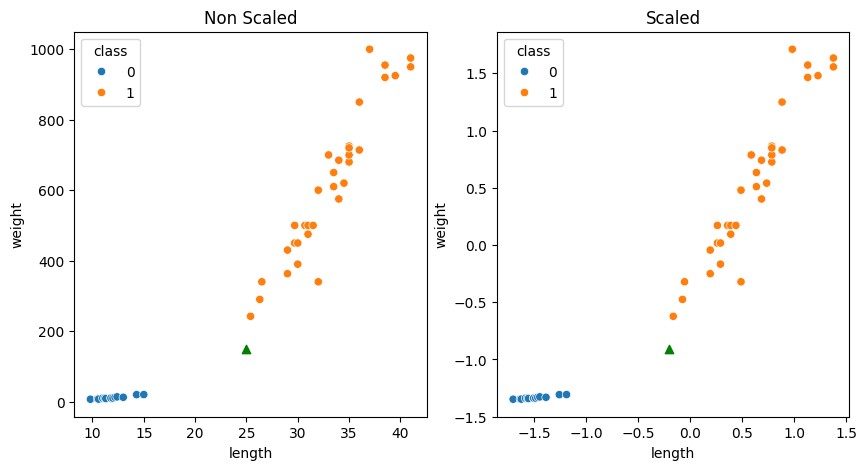

[1]


In [ ]:
# 25,150 의 품종 예측
# 전체 데이터 시각화
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler  #평균이 0 표준편차가 1로 데이터를 표준화
from sklearn.neighbors import KNeighborsClassifier

plt.figure(figsize=(10,5))
# 비표준화
plt.subplot(1,2,1)
plt.title("Non Scaled")
sns.scatterplot(x='length', y='weight', hue='class', data=df)
plt.scatter(25, 150, marker='^',color = 'green',label='predict')
non_Scaled_Knn = KNeighborsClassifier()
non_Scaled_Knn.fit(df[['length','weight']].to_numpy(), df['class'].to_numpy())
print(non_Scaled_Knn.predict([[25,150]]))  # 0 빙어  1 도미



# 표준화
df2 = df.copy()
scaler = StandardScaler()
scaler.fit(df2[['length','weight']].to_numpy())
df2[['length','weight']] = scaler.transform(df2[['length','weight']].to_numpy())
plt.subplot(1,2,2)
plt.title("Scaled")
sns.scatterplot(x='length', y='weight', hue='class', data=df2)
p = scaler.transform([[25,150]])
plt.scatter(p[:,0],p[:,1], marker='^',color = 'green',label='predict')
plt.show()

Scaled_Knn = KNeighborsClassifier()
Scaled_Knn.fit(df2[['length','weight']].to_numpy(), df2['class'].to_numpy())
print(Scaled_Knn.predict([[25,150]]))  # 0 빙어  1 도미


# EDA ▶ 모델선택 ▶ 학습 ▶ 평가
```
EDA
  전처리
    결측치  isna(), info()
    이상치  boxplot, describe()
    표준화 - StandardScaler
  피처엔지니어링
    새로운 특성을 추가(날자 ->년 월 일, 주말, 연속형 데이터를->구간분리(범주형)
모델
  학습용, 검증용 분리 🦖 train_test_split
  KNeighborsClassifier    
```

In [ ]:
!pip install ucimlrepo
from ucimlrepo import fetch_ucirepo

# fetch dataset
heart_disease = fetch_ucirepo(id=45)

# data (as pandas dataframes)
X = heart_disease.data.features
y = heart_disease.data.targets

,num
0,0
1,2
2,1
3,0
4,0
...,...
298,1
299,2
300,3
301,1


In [ ]:
np.unique(y, return_counts=True)

(array([0, 1, 2, 3, 4]), array([164,  55,  36,  35,  13]))

# k 최근접 이웃 회귀

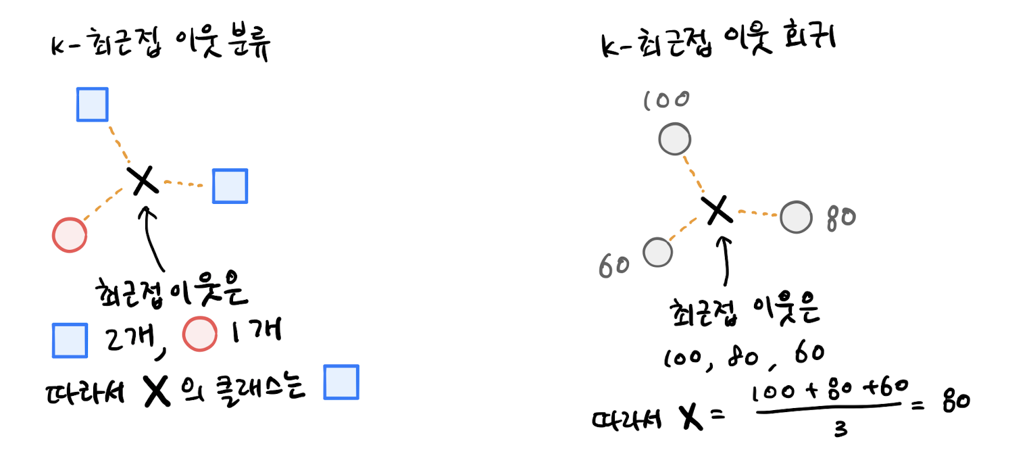

In [ ]:
import numpy as np
perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0,
    21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5,
    22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5,
    27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0,
    36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0,
    40.0, 42.0, 43.0, 43.0, 43.5, 44.0],
    )
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0,
    110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0,
    130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0,
    197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0,
    514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0,
    820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0,
    1000.0, 1000.0],
    )

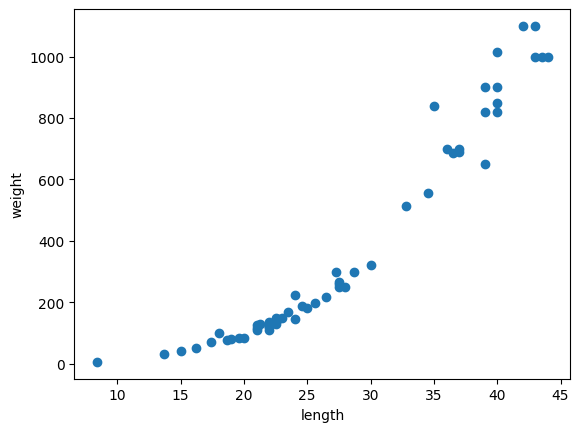

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [ ]:
# 길이가 주어졌을대 무게를 예측
# 표준화
# 데이터분할(학습 / 평가)
# 모델은 케이 최근접이웃 회귀
# 회귀 평가 (평균제곱오차, 평균 제곱근 오차, 평균 절대 오차, 결정계수 R^2 Score)

평균제곱오차
$$MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$$



평균절대오차
$$MAE = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i|$$


결정계수
$$R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}$$

```
회귀모델이 데이터를 얼마나잘 설명하는지를 나타냄
1에 가까울수록 좋은 모델, 0이면 평균값만 나태냄(예측불가)
분산을 기준으로 평가하는데 음수가 될수도 있음(엉터리모델)
```

In [ ]:
# 데이터 분할
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler  # 평균 0 표준편차 1
X  = perch_length
y = perch_weight
X = np.expand_dims(X, axis=1)
ss = StandardScaler()
X = ss.fit_transform(X)
X_train,X_test,y_train,y_test =  train_test_split(X,y)
# 모델
knr = KNeighborsRegressor(n_neighbors=3)
knr.fit(X_train,y_train)
knr.score(X_train,y_train), knr.score(X_test,y_test)

(0.9835400080856409, 0.9785984041165205)

In [ ]:
# 회귀를 평가하는 평가지표
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print(
  mean_absolute_error(y_test, knr.predict(X_test)),
  mean_squared_error(y_test, knr.predict(X_test)),
  r2_score(y_test, knr.predict(X_test))
)

30.583333333333325 2713.2638888888873 0.9785984041165205


# 모델사용법
```
1.회귀
  회귀에 맞는 모델선택  
  평가 : 오차(실제값 - 예측한 값)가 적을수록
    mse, mae --> 값 자체가 어느정도 성능은 내는지 알수 없다
    결정개수 : 모델의 설명력을 평가  1에 가까울수록 완벽 모델
2.분류
  분류에 맞는 모델선택
  평가 : 정확성(정답대비 몇개 맞췄는지)
  모델.score()
3.학습
  모델.fit()  
4.예측 모델.predict()  는 모델의 결과값을 나타낸다
유틸리티함수(StandarScaler 등)
함수.fit()  규칙적용
함수.transform() 데이터 변환
두개를 합쳐서 함수.fit_transform()
```

In [ ]:
from sklearn.datasets import load_boston

ImportError: 
`load_boston` has been removed from scikit-learn since version 1.2.

The Boston housing prices dataset has an ethical problem: as
investigated in [1], the authors of this dataset engineered a
non-invertible variable "B" assuming that racial self-segregation had a
positive impact on house prices [2]. Furthermore the goal of the
research that led to the creation of this dataset was to study the
impact of air quality but it did not give adequate demonstration of the
validity of this assumption.

The scikit-learn maintainers therefore strongly discourage the use of
this dataset unless the purpose of the code is to study and educate
about ethical issues in data science and machine learning.

In this special case, you can fetch the dataset from the original
source::

    import pandas as pd
    import numpy as np

    data_url = "http://lib.stat.cmu.edu/datasets/boston"
    raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
    data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
    target = raw_df.values[1::2, 2]

Alternative datasets include the California housing dataset and the
Ames housing dataset. You can load the datasets as follows::

    from sklearn.datasets import fetch_california_housing
    housing = fetch_california_housing()

for the California housing dataset and::

    from sklearn.datasets import fetch_openml
    housing = fetch_openml(name="house_prices", as_frame=True)

for the Ames housing dataset.

[1] M Carlisle.
"Racist data destruction?"
<https://medium.com/@docintangible/racist-data-destruction-113e3eff54a8>

[2] Harrison Jr, David, and Daniel L. Rubinfeld.
"Hedonic housing prices and the demand for clean air."
Journal of environmental economics and management 5.1 (1978): 81-102.
<https://www.researchgate.net/publication/4974606_Hedonic_housing_prices_and_the_demand_for_clean_air>


In [ ]:
import pandas as pd
import numpy as np

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

In [ ]:
# KNeighborsRegressor 이 모델로 학습하기 평가  mae mse R^2

In [ ]:
X = data
y = target

In [ ]:
X.shape

(506, 13)

In [ ]:
np.isnan(X).sum()

np.int64(0)

In [ ]:
 cols = ['CRIM',
 'ZN'  ,
 'INDUS',
 'CHAS' ,
 'NOX'  ,
 'RM'   ,
 'AGE'  ,
 'DIS'  ,
 'RAD'  ,
 'TAX'  ,
 'PTRATIO',
 'B'      ,
 'LSTAT'  ,
 ]
 df = pd.DataFrame(X,columns=cols)
 df['MEDV'] = y
 df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


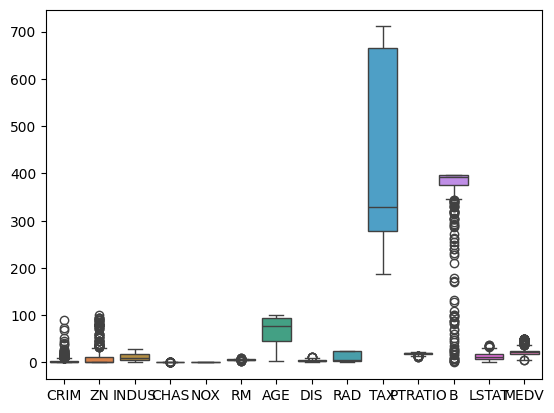

In [ ]:
import seaborn as sns
sns.boxplot(data=df)
plt.show()

<Axes: ylabel='MEDV'>

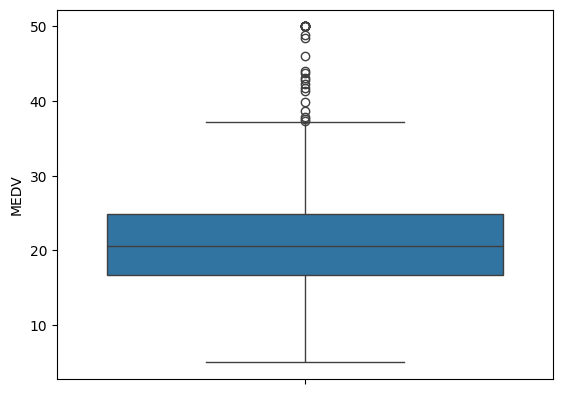

In [ ]:
# 테이터 분할
from sklearn.model_selection import train_test_split
XX = df.drop('MEDV',axis=1)
yy = df['MEDV']
X_train,X_test,y_train,y_test = train_test_split(XX,yy)
# sns.boxplot(y_train)


In [ ]:
# 표준화
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss = ss.fit(X_train)
X_train_scaled = ss.transform(X_train)
X_test_scaled = ss.transform(X_test)

In [ ]:
# 학습
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor()
knr.fit(X_train_scaled,y_train)

KNeighborsRegressor()

In [ ]:
# 평가
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
y_predict = knr.predict(X_test_scaled)
print(
  mean_absolute_error(y_test, y_predict),
  mean_squared_error(y_test, y_predict),
  r2_score(y_test, y_predict)
)

3.492283464566929 33.39184881889763 0.6650460765913562


성능 높이기
```
정답을 제외한 모든 학습데이터를 스케일링하고
1.boxplot을이용해서 이상치가 심한 컬럼기준으로 이상치를 제거
만약 데이터가 너무 적으면 두번째로 심한컬럼기준으로.

2. 정답인 주택가격도 최상위 가격이존재.. 이것도 이상치를 제거

3. 모든 학습데이터를 표준화
4. train, test 로 분할하고
5. 학습
6. 평가

```

In [ ]:
 cols = ['CRIM',
 'ZN'  ,
 'INDUS',
 'CHAS' ,
 'NOX'  ,
 'RM'   ,
 'AGE'  ,
 'DIS'  ,
 'RAD'  ,
 'TAX'  ,
 'PTRATIO',
 'B'      ,
 'LSTAT'  ,
 ]
 df = pd.DataFrame(X,columns=cols)
 df['MEDV'] = y
 df.head()

import seaborn as sns
# sns.boxplot(data=df)
Q1 = df['B'].quantile(0.25)
Q3 = df['B'].quantile(0.75)
IQR = Q3-Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
df = df[(df['B'] > lower) & (df['B'] < upper)]
df.shape
X = df.drop('MEDV',axis=1)
y = df['MEDV']
ss = StandardScaler()
X = ss.fit_transform(X)
X_train,X_test,y_train,y_test = train_test_split(X,y)
knr = KNeighborsRegressor()
knr.fit(X_train,y_train)
y_predict = knr.predict(X_test)
mean_absolute_error(y_test, y_predict), mean_squared_error(y_test, y_predict), r2_score(y_test, y_predict)

(2.6599999999999997, 14.980785185185189, 0.7316629172454807)